# Initial Conditions Optimization
## Plot History

In [1]:
%matplotlib inline
import matplotlib
matplotlib.font_manager._rebuild()
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.style as style
style.use('fivethirtyeight')
import ray
import io
import os
from IPython.display import display, HTML, Markdown

## Load PlayFair Display and Roboto Fonts from Google

In [2]:
from tempfile import NamedTemporaryFile
import urllib.request
import matplotlib.font_manager as fm

github_url = 'https://github.com/google/fonts/blob/master/ofl/playfairdisplay/static/PlayfairDisplay-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
heading_font = fm.FontProperties(fname=f.name, size=28)

github_url = 'https://github.com/google/fonts/blob/master/ofl/roboto/static/Roboto-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
subtitle_font = fm.FontProperties(fname=f.name, size=20)


## Load Humor Sans Font

In [3]:
github_url = 'http://antiyawn.com/uploads/Humor-Sans-1.0.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
comic_font = fm.FontProperties(fname=f.name, size=18)

# Main code

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}

<IPython.core.display.Javascript object>

## Load Initial Parameters

In [5]:
dfparam = pd.read_csv("data/param.csv")
display(dfparam)


state  start-date  prediction-range         s0  e0  a0   i0   r0   d0  \
0     SP  2020-03-15               200  8000000.0   0   0  800  300  250   
1     ES  2020-04-01               200   475000.0   0   0   50  250   50   
2     MG  2020-04-01               200  1100000.0   0   0  200  250   40   
3     RJ  2020-03-20               200   700000.0   0   0  800  250   50   
4     CE  2020-03-20               200   800000.0   0   0  800  250   50   
5     PE  2020-03-20               200   700000.0   0   0  800  250  100   
6     AM  2020-03-20               200   700000.0   0   0  800  250  100   
7     PA  2020-03-20               200   700000.0   0   0  800  250  100   
8     PI  2020-03-20               200   700000.0   0   0  800  250  100   
9     RR  2020-03-20               200   700000.0   0   0  800  250  100   
10    AP  2020-03-20               200   700000.0   0   0  800  250  100   

    START  RATIO  WCASES  WREC  
0     100   0.15    0.55  0.01  
1     100   0.15    0.65  0.01  
2     100   0.15    0.55  0.01  
3     100   0.15    0.50  0.01  
4     100   0.15    0.50  0.01  
5     100   0.15    0.50  0.01  
6     100   0.15    0.50  0.01  
7     100   0.15    0.50  0.01  
8     100   0.15    0.50  0.01  
9     100   0.15    0.50  0.01  
10    100   0.15    0.50  0.01

## Select data set

In [6]:
opt=5
newModel=False

#select history file version, model and states
if opt==0:
    version=10 
    model="Brute_Force"
    states=['SP','ES','MG','RJ','PE','CE','AM']

if opt==1:
    version=100 
    model="Yabox"
    states=['SP','ES','MG','RJ','PE','CE','AM']

if opt==2:
    version=1000 
    model="DE_SciPy"
    states=['SP','ES','MG','RJ','PE','CE','AM']    
    
if opt==3:
    version=103
    model="Yabox"
    states=dfparam.state

if opt==4:
    version=1002 
    model="DE_SciPy"
    states=['SP','ES','MG','RJ','PE','CE','AM'] 
    
if opt==5:
    version=105
    newModel=True
    model="Yabox"
    states=dfparam.state
    

In [7]:
strFile="results/IC_optimizedStates"+str(version)+".csv"
if os.path.isfile(strFile):
    os.remove(strFile)

## Plot and Save Results

# Results for SP State Brazil

gtot  startdate  startNcases        s0    i0  d0  wcases    wrec
758  1.028822e+07 2020-03-15            0  13441699  1419  14  0.5758  0.0228

## 5 Lowest Results SP State Brazil

gtot  startdate  startNcases        s0    i0  d0  wcases    wrec
758   1.028822e+07 2020-03-15            0  13441699  1419  14  0.5758  0.0228
2587  1.074809e+08 2020-03-14            3  13351869  1261  63  0.3797  0.0617
170   2.105145e+08 2020-03-17            0   8576820  1067  63  0.6765  0.0392
1429  2.320278e+08 2020-03-17            2  12692599   842  65  0.5842  0.0506
1354  2.668495e+08 2020-03-15            1  12630778   978  27  0.3878  0.0397

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


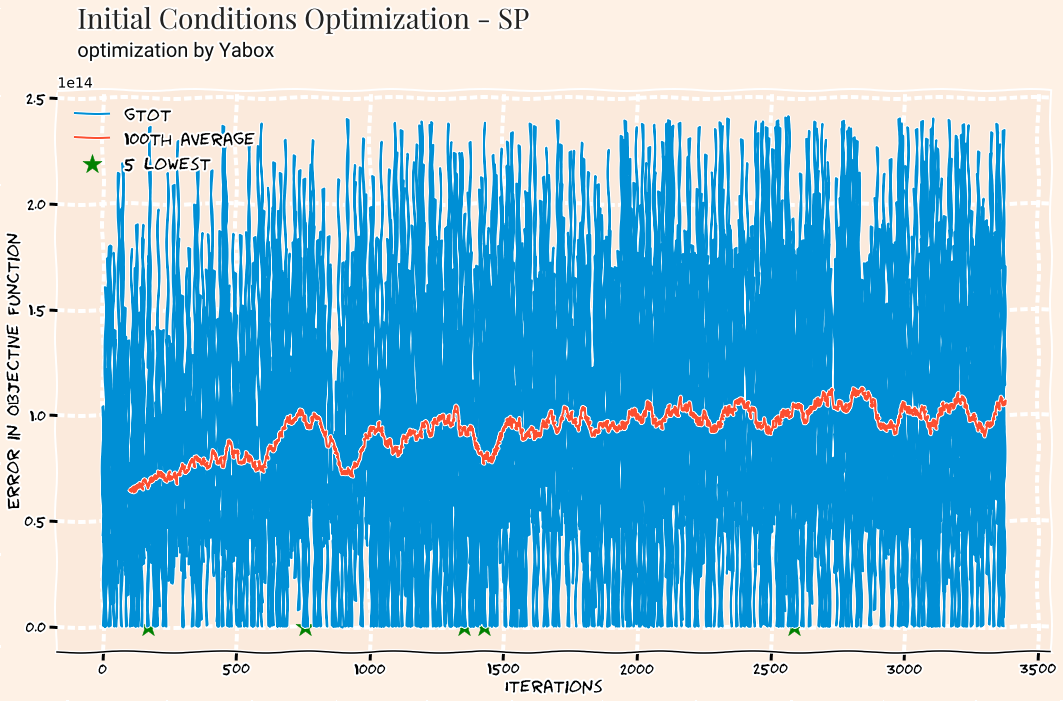

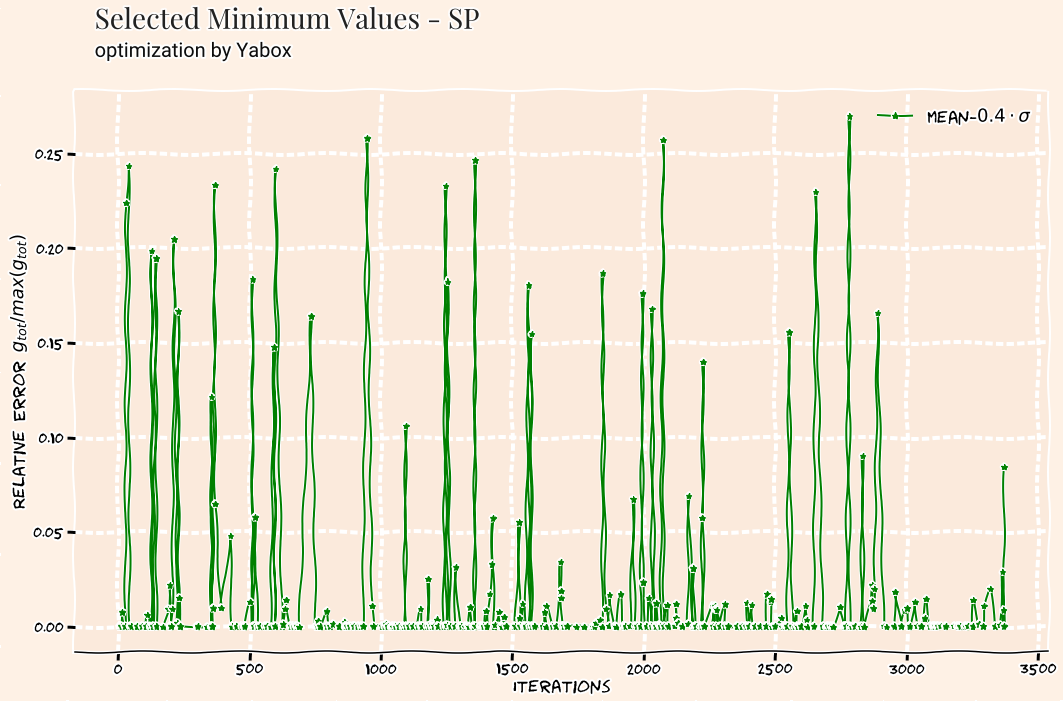

# Results for ES State Brazil

gtot  startdate  startNcases      s0  i0  d0  wcases    wrec
100  1.228820e+06 2020-04-08            1  512296  52  88  0.7422  0.0432

## 5 Lowest Results ES State Brazil

gtot  startdate  startNcases      s0  i0  d0  wcases    wrec
100   1.228820e+06 2020-04-08            1  512296  52  88  0.7422  0.0432
2146  3.563822e+06 2020-04-09            3  533228  55  57  0.7388  0.0346
1121  1.488258e+07 2020-04-07            4  760545  54  38  0.7970  0.0793
1959  2.740223e+07 2020-04-07            1  816127  43  41  0.4970  0.0219
498   6.569973e+07 2020-04-07            2  482302  59  73  0.7298  0.0274

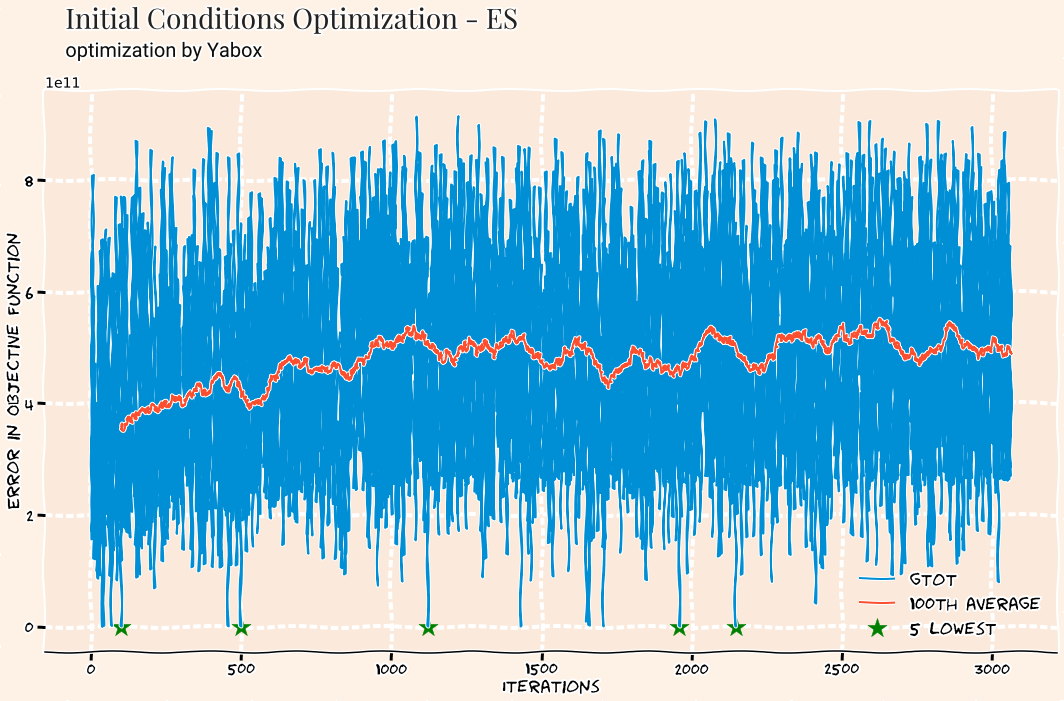

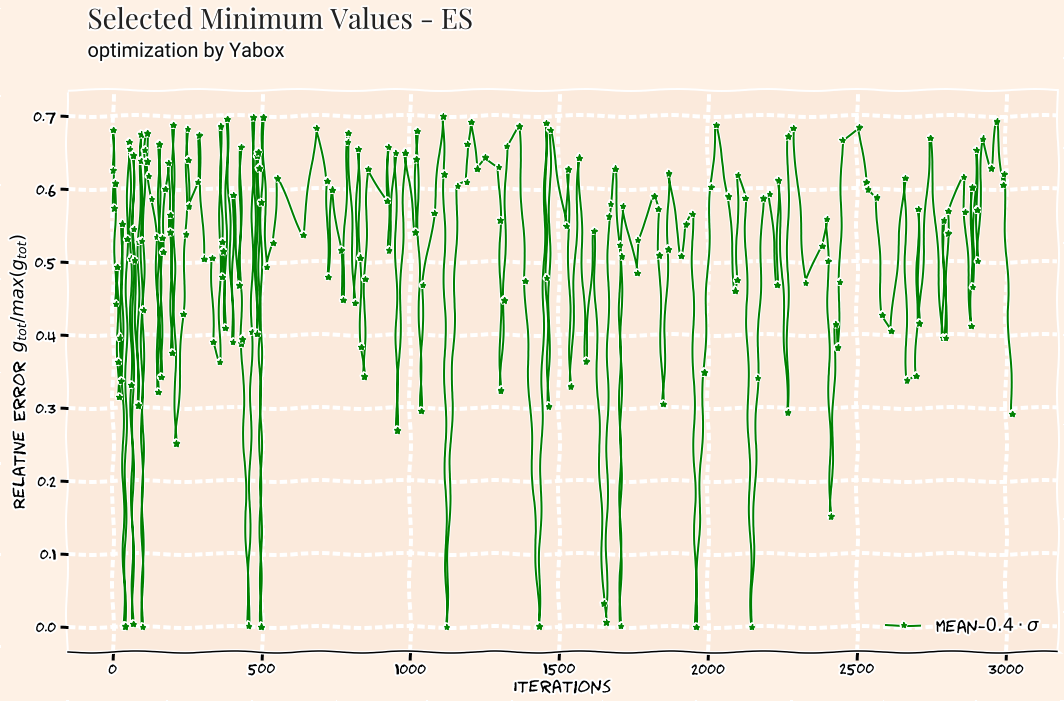

# Results for MG State Brazil

gtot  startdate  startNcases       s0   i0  d0  wcases    wrec
1264  2.758821e+08 2020-03-30            2  1795035  412   4  0.3731  0.0303

## 5 Lowest Results MG State Brazil

gtot  startdate  startNcases       s0   i0  d0  wcases    wrec
1264  2.758821e+08 2020-03-30            2  1795035  412   4  0.3731  0.0303
814   2.978512e+08 2020-04-02            4  1808990  305   1  0.4633  0.0229
1197  3.464284e+08 2020-04-01            5  1679584  396   5  0.6033  0.0237
1632  4.248069e+08 2020-04-01            2  1659114  401   5  0.5426  0.0225
2465  6.274228e+08 2020-03-31            4  1742424  328   5  0.3658  0.0346

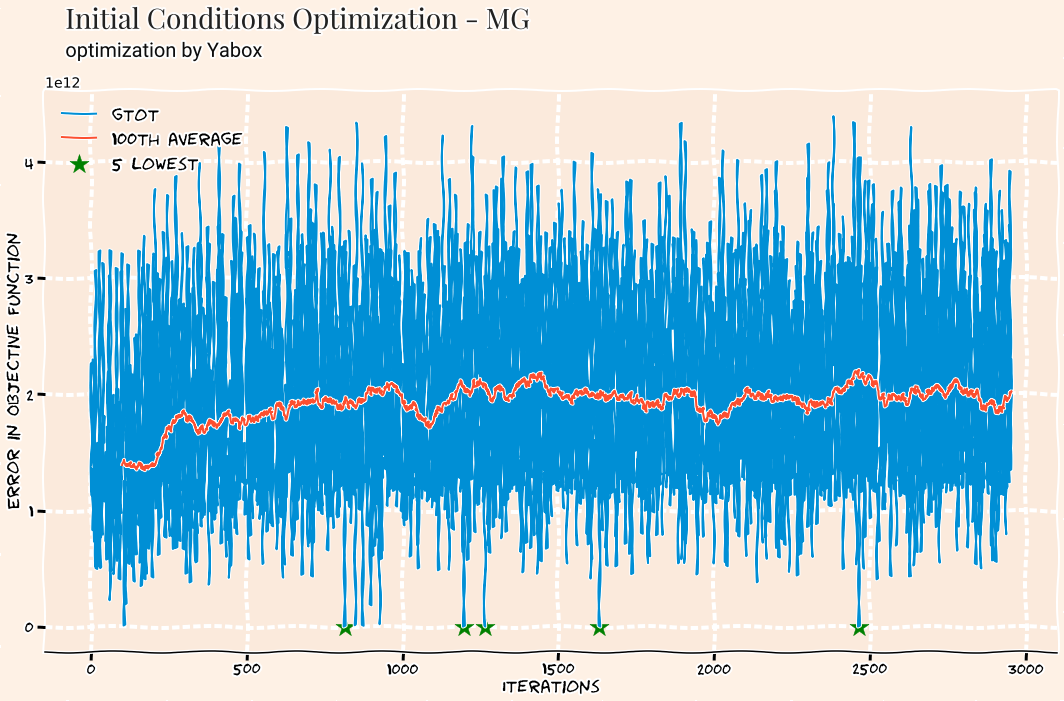

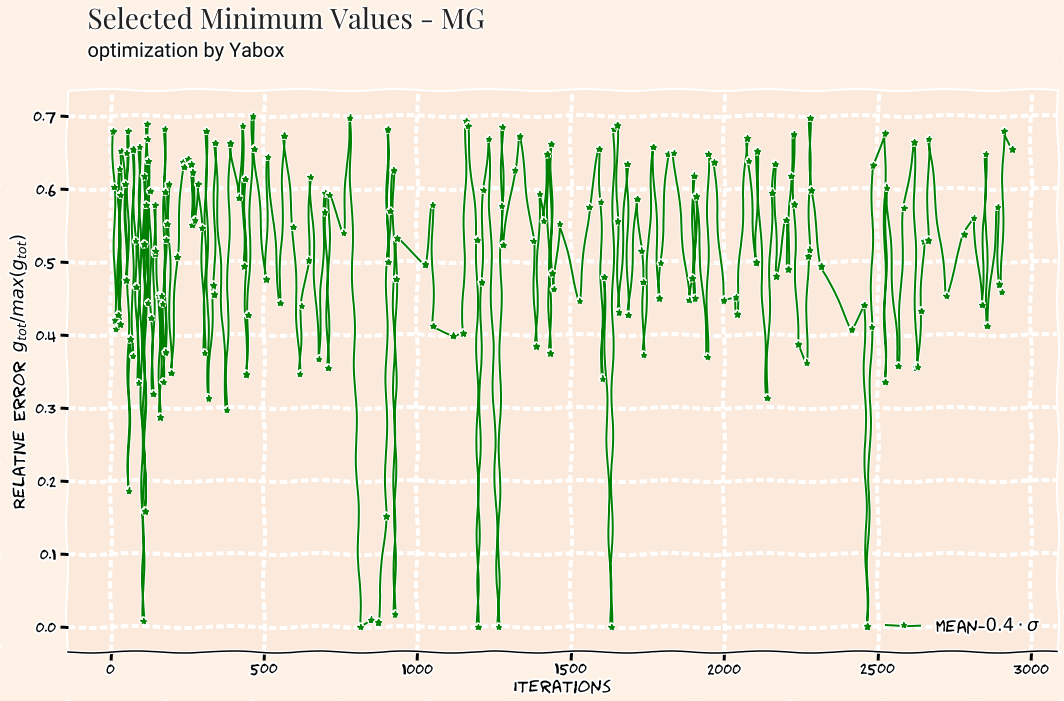

# Results for RJ State Brazil

gtot  startdate  startNcases      s0   i0  d0  wcases    wrec
673  6.813385e+06 2020-03-12           35  995092  820   1  0.6334  0.0339

## 5 Lowest Results RJ State Brazil

gtot  startdate  startNcases       s0    i0  d0  wcases    wrec
673   6.813385e+06 2020-03-12           35   995092   820   1  0.6334  0.0339
89    2.702387e+07 2020-03-14           12  1169452   945   4  0.4777  0.0294
364   2.947333e+07 2020-03-13            5   995008  1290   9  0.4763  0.0467
205   3.166664e+07 2020-03-14           23   850485  1234   6  0.3425  0.0392
1330  3.402826e+07 2020-03-15           35  1151269  1280   3  0.3807  0.0269

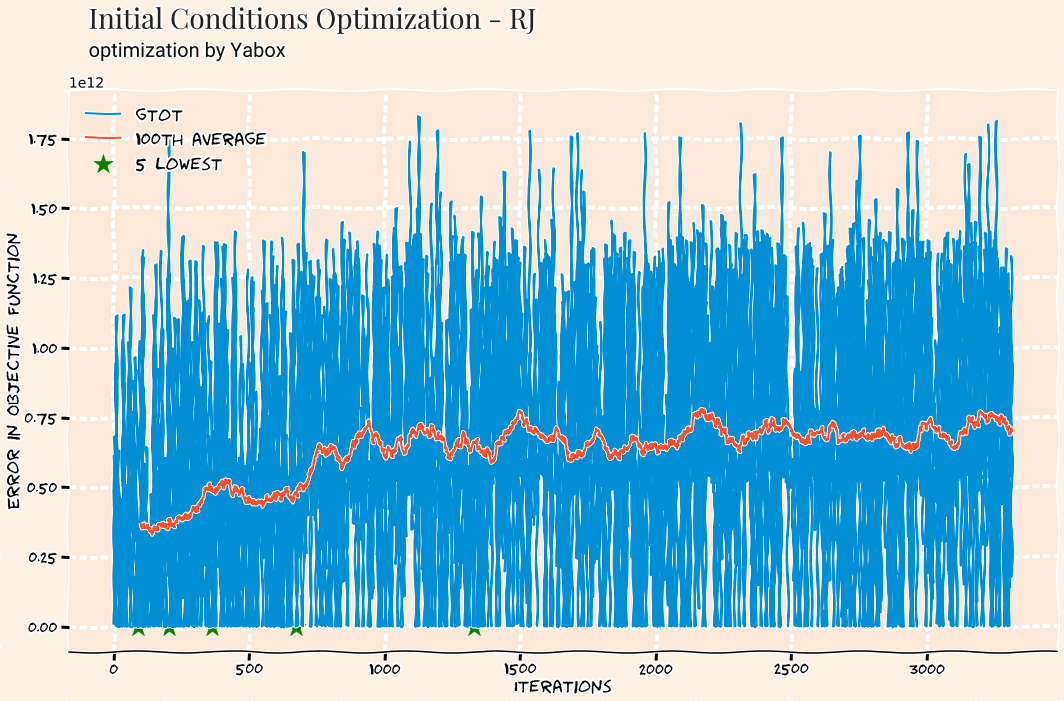

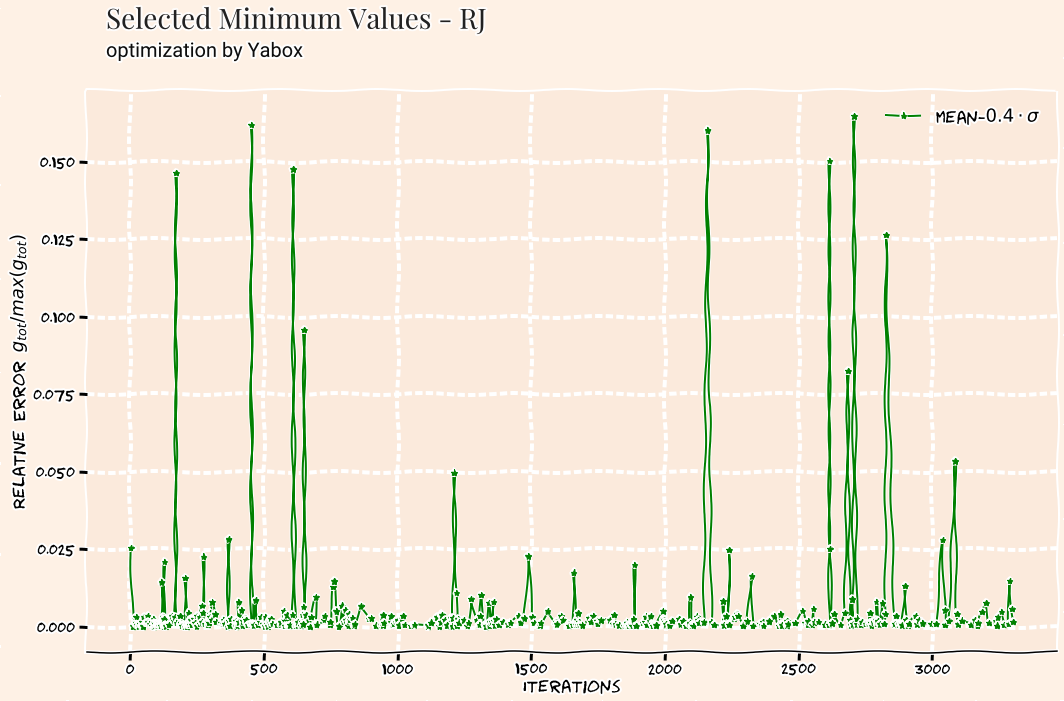

# Results for CE State Brazil

gtot  startdate  startNcases      s0    i0  d0  wcases    wrec
2574  5.843416e+06 2020-03-20            8  981004  1152  16  0.5564  0.0714

## 5 Lowest Results CE State Brazil

gtot  startdate  startNcases       s0    i0   d0  wcases    wrec
2574  5.843416e+06 2020-03-20            8   981004  1152   16  0.5564  0.0714
1005  9.827996e+06 2020-03-19           14   844265  1301  134  0.5830  0.0373
2085  1.854118e+07 2020-03-18            4  1008067   432   95  0.5536  0.0284
910   1.860431e+07 2020-03-20           11   988945   889   84  0.7434  0.0273
980   3.007274e+07 2020-03-20            7   992413  1005  100  0.7509  0.0671

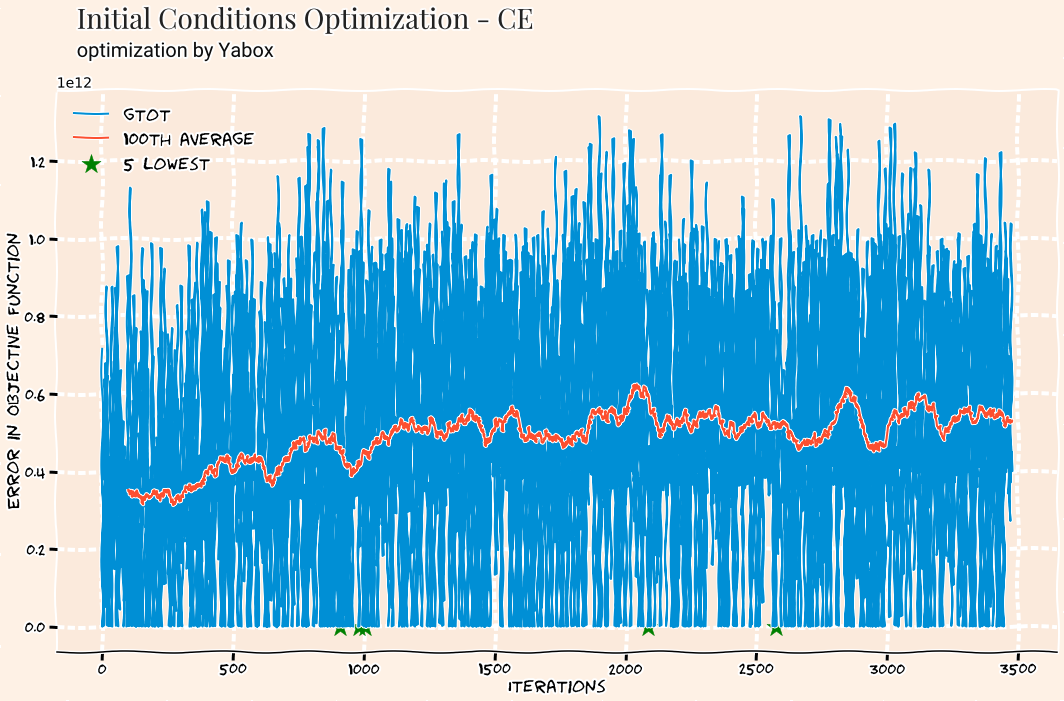

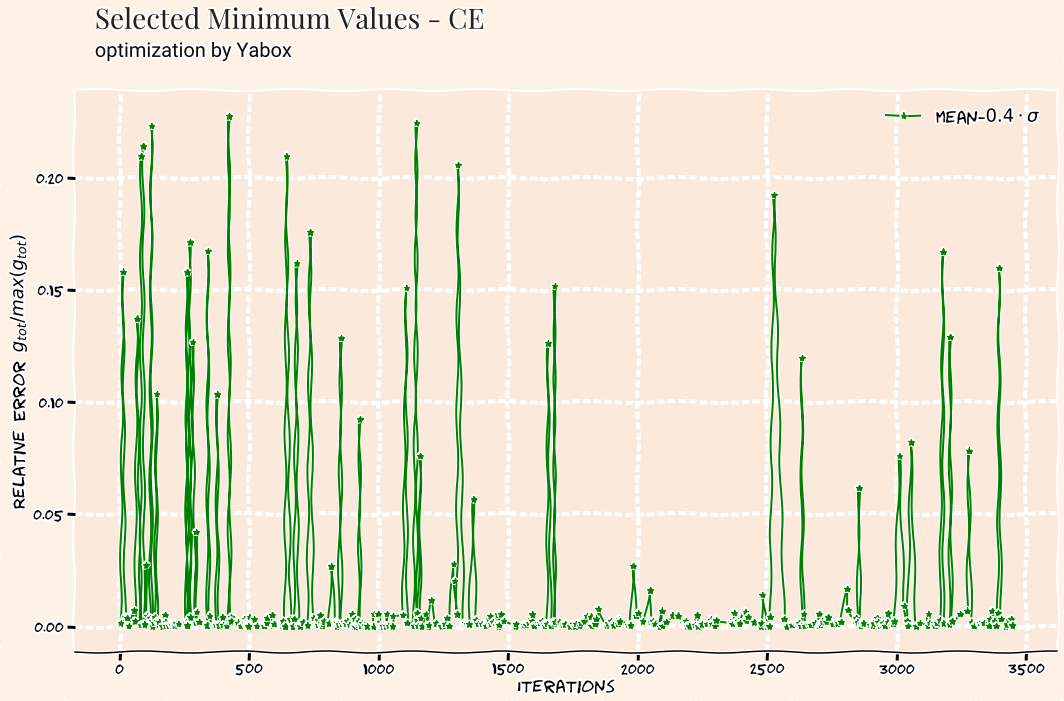

# Results for PE State Brazil

gtot  startdate  startNcases       s0    i0  d0  wcases    wrec
1066  2.031726e+06 2020-03-19          116  1199337  1265  98  0.7431  0.0459

## 5 Lowest Results PE State Brazil

gtot  startdate  startNcases       s0    i0   d0  wcases    wrec
1066  2.031726e+06 2020-03-19          116  1199337  1265   98  0.7431  0.0459
762   3.195846e+06 2020-03-19           37  1236243  1060  123  0.4869  0.0264
1109  3.623912e+06 2020-03-21           28  1183512   750   39  0.3844  0.0419
2719  3.723810e+06 2020-03-21           36  1237372   744   37  0.4045  0.0297
1251  3.932019e+06 2020-03-20           65  1208290   901   57  0.3876  0.0357

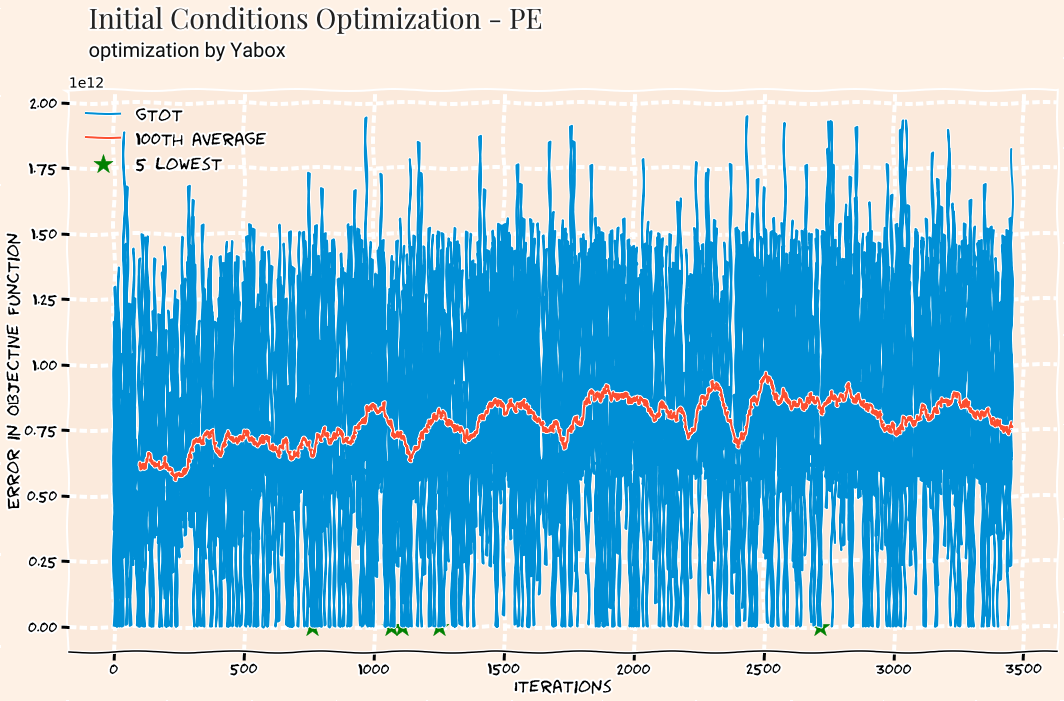

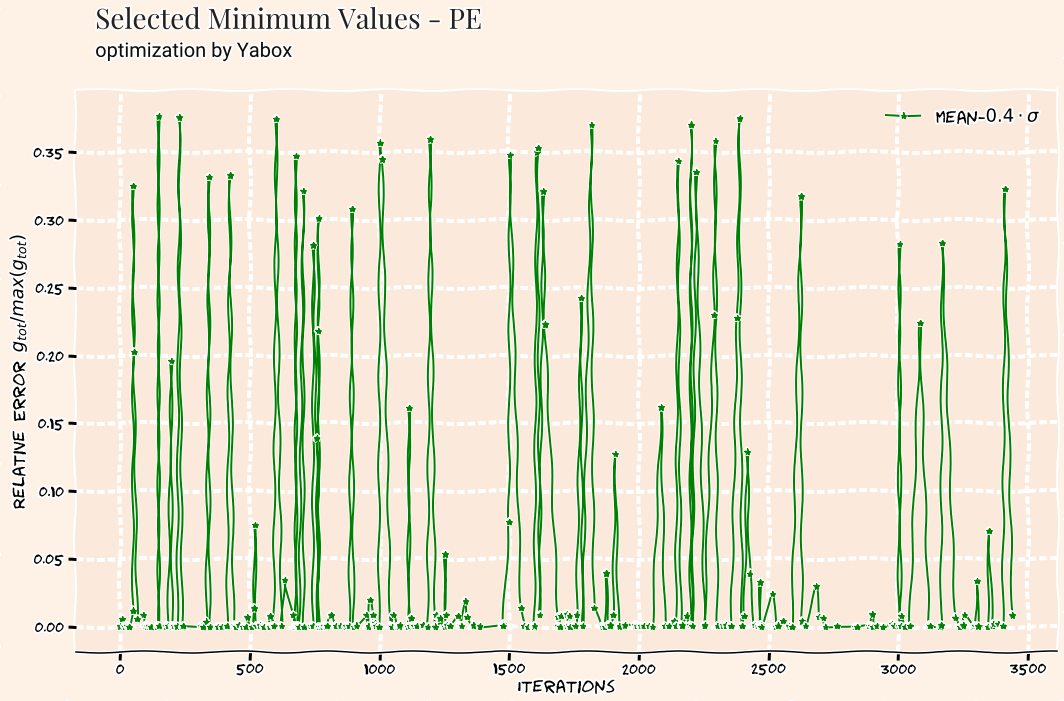

# Results for AM State Brazil

gtot  startdate  startNcases       s0   i0  d0  wcases    wrec
197  1.459027e+07 2020-03-24           24  1178492  922  53  0.4114  0.0773

## 5 Lowest Results AM State Brazil

gtot  startdate  startNcases       s0    i0  d0  wcases    wrec
197  1.459027e+07 2020-03-24           24  1178492   922  53  0.4114  0.0773
359  1.827640e+07 2020-03-25           16  1071615  1272  32  0.5250  0.0624
201  2.524429e+07 2020-03-25            3   742038  1388  39  0.7957  0.0667
432  2.775560e+07 2020-03-24            8  1045594   742  25  0.3495  0.0521
153  2.880538e+07 2020-03-23            5   688971   378  25  0.7836  0.0722

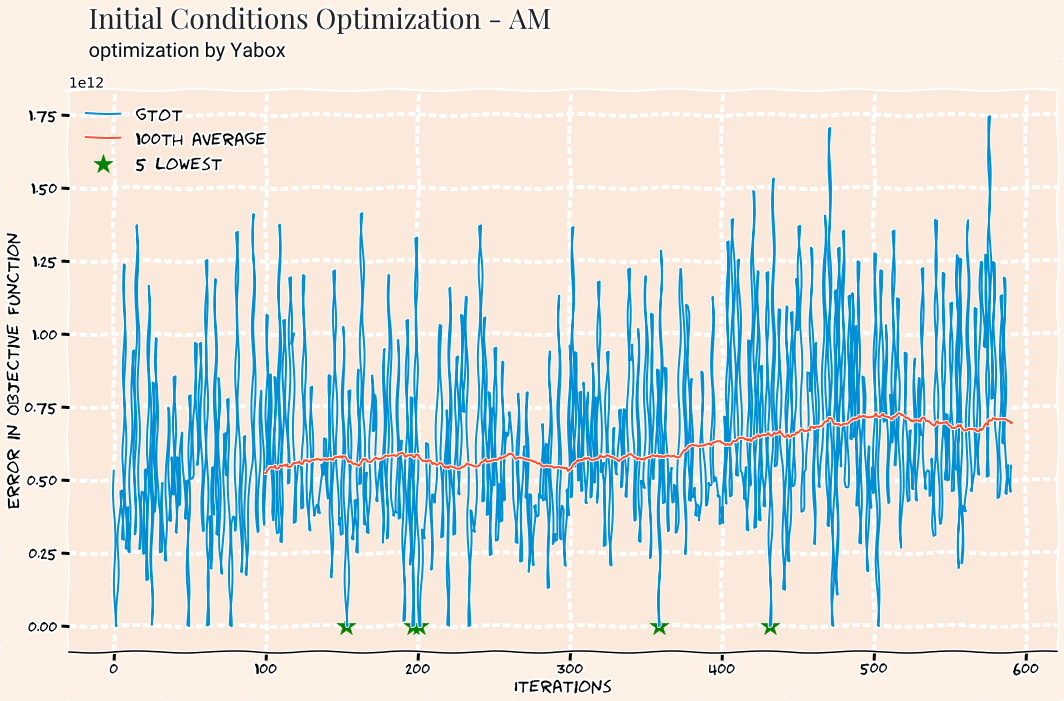

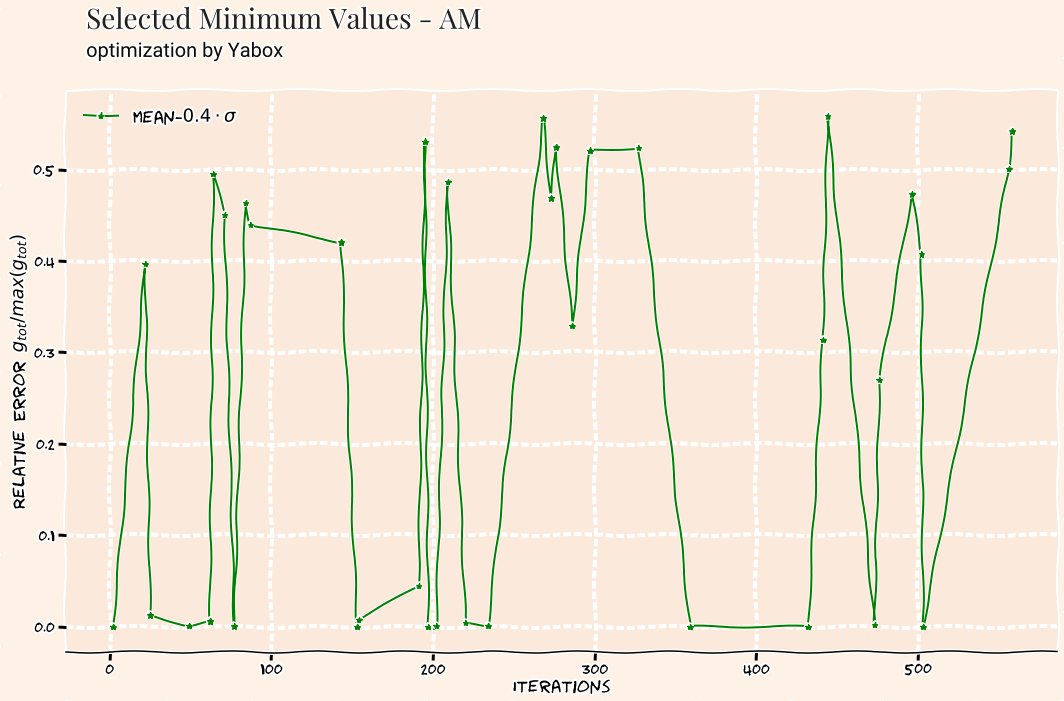

# Results for PA State Brazil

gtot  startdate  startNcases       s0    i0   d0  wcases    wrec
3229  4.409293e+06 2020-03-24           66  1132540  1234  116   0.734  0.0497

## 5 Lowest Results PA State Brazil

gtot  startdate  startNcases       s0    i0   d0  wcases    wrec
3229  4.409293e+06 2020-03-24           66  1132540  1234  116  0.7340  0.0497
2651  1.792011e+07 2020-03-27           24  1131906   868  108  0.7241  0.0439
3485  2.001696e+07 2020-03-27           17  1115975  1636  178  0.5227  0.0329
1449  2.201769e+07 2020-03-27           42  1121113  1198   54  0.7520  0.0662
1140  2.798069e+07 2020-03-24           83  1111212  1219   96  0.6860  0.0559

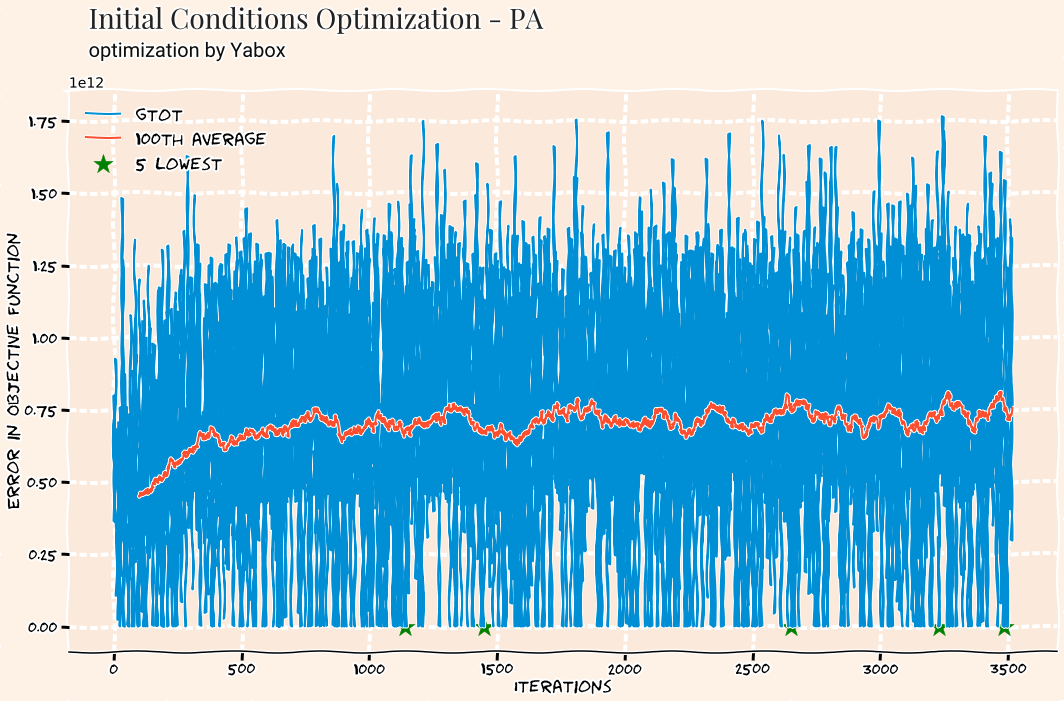

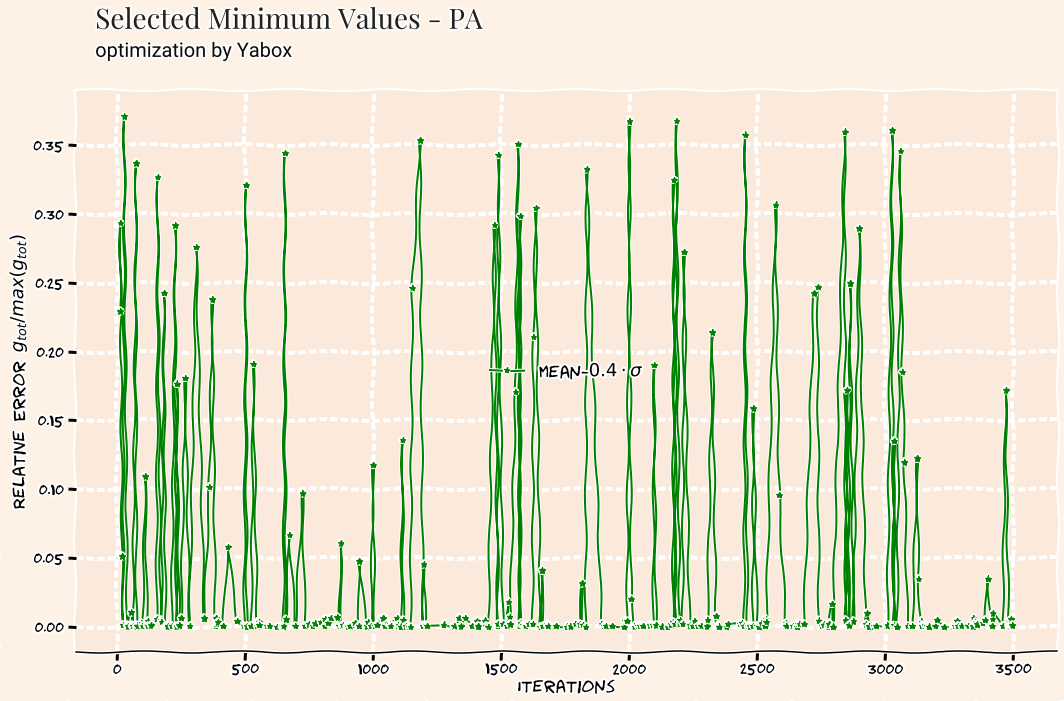

# Results for PI State Brazil

gtot  startdate  startNcases      s0    i0  d0  wcases    wrec
1206  514335.876881 2020-03-24           31  962264  1549  30   0.441  0.0339

## 5 Lowest Results PI State Brazil

gtot  startdate  startNcases       s0    i0  d0  wcases    wrec
1206  5.143359e+05 2020-03-24           31   962264  1549  30  0.4410  0.0339
2610  5.994827e+05 2020-03-24           37   730734  1154  24  0.5464  0.0615
52    9.196367e+05 2020-03-26           10   910275  1190  29  0.7398  0.0765
3687  1.068206e+06 2020-03-24           81  1185792  1617  33  0.4996  0.0288
1437  1.254170e+06 2020-03-24           76  1159107  1364   9  0.5368  0.0527

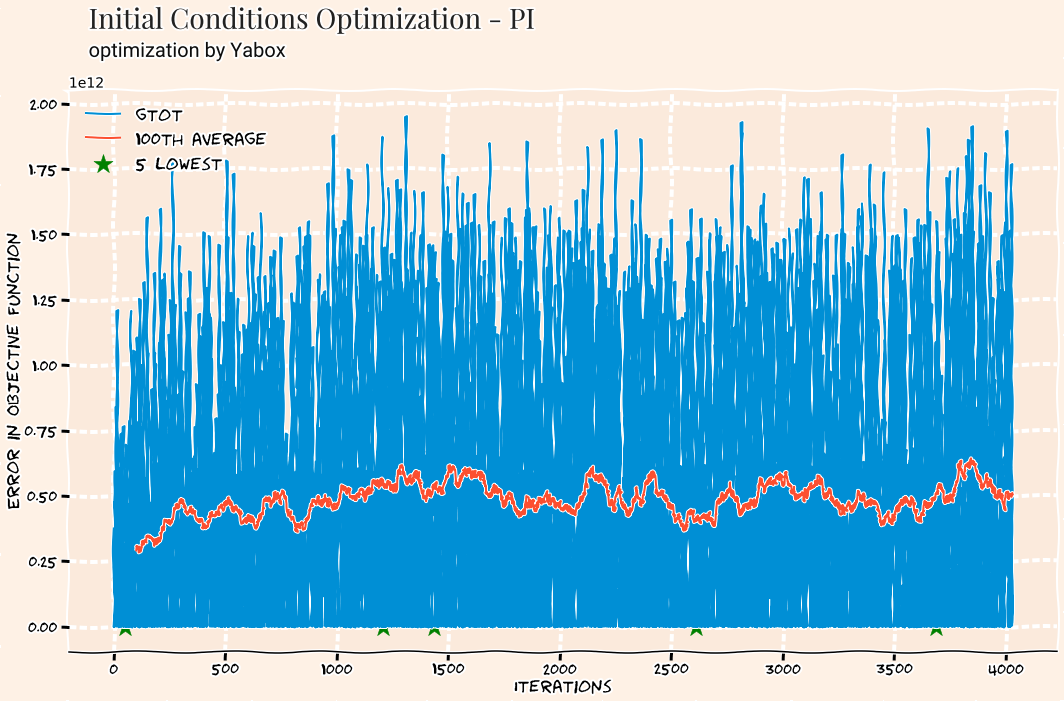

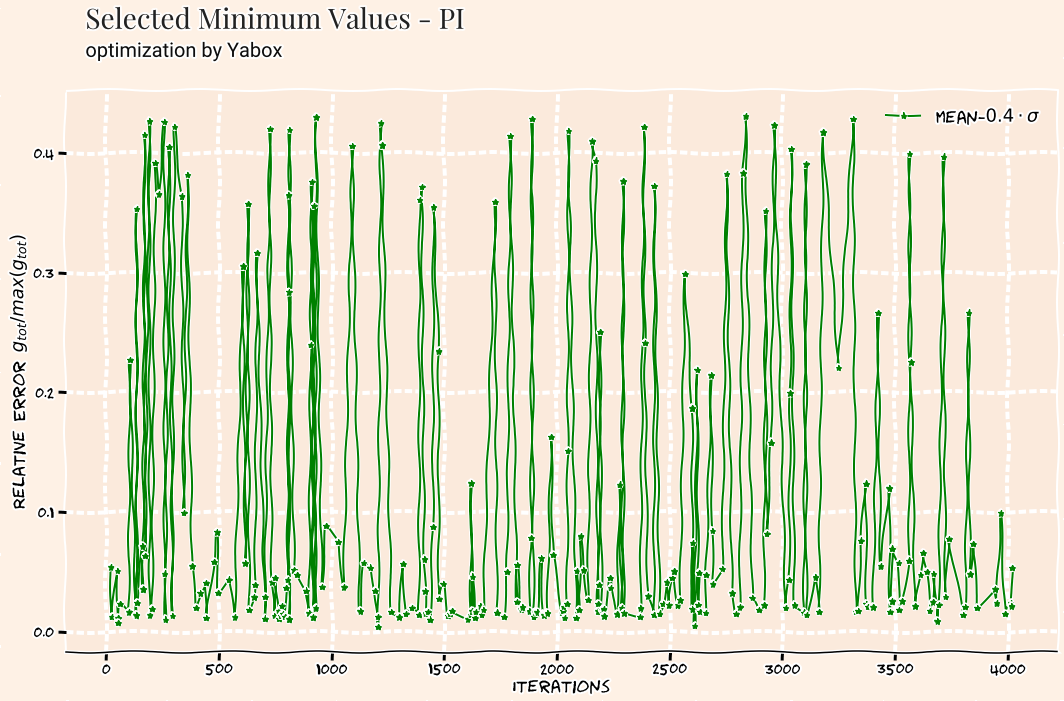

# Results for RR State Brazil

gtot  startdate  startNcases       s0    i0  d0  wcases    wrec
1634  455252.831847 2020-03-19            2  1109936  1029   6  0.5061  0.0229

## 5 Lowest Results RR State Brazil

gtot  startdate  startNcases       s0    i0  d0  wcases    wrec
1634  4.552528e+05 2020-03-19            2  1109936  1029   6  0.5061  0.0229
1662  6.532002e+05 2020-03-20            1  1136479   992  17  0.5603  0.0783
483   1.006499e+06 2020-03-20            1  1016605  1004  19  0.6274  0.0532
543   1.283993e+06 2020-03-19            1  1102010  1374  21  0.3929  0.0668
1642  1.397679e+06 2020-03-21            5  1155012  1225  25  0.6849  0.0302

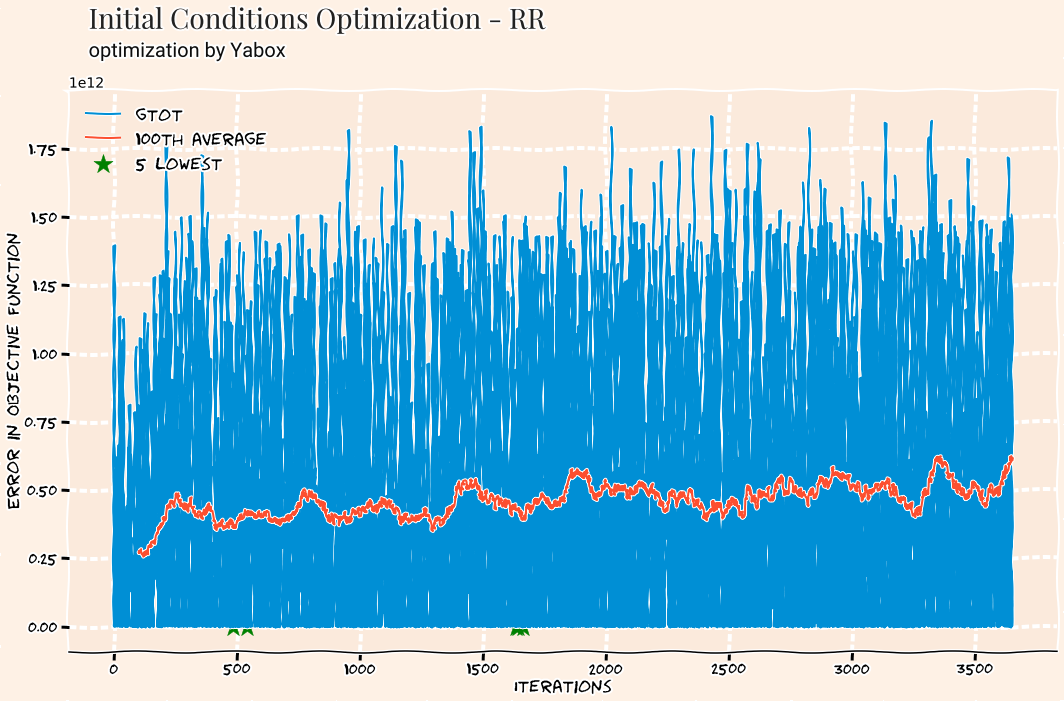

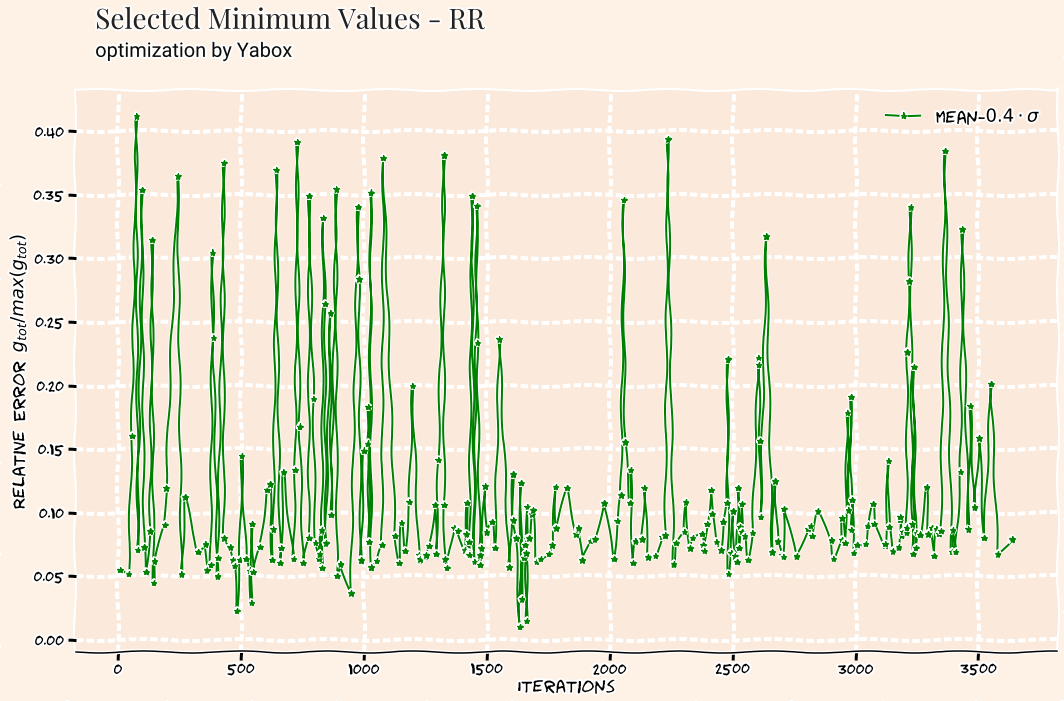

# Results for AP State Brazil

gtot  startdate  startNcases      s0    i0  d0  wcases    wrec
127  1.126294e+06 2020-03-14           31  672896  1303   3  0.5386  0.0605

## 5 Lowest Results AP State Brazil

gtot  startdate  startNcases      s0    i0  d0  wcases    wrec
127   1.126294e+06 2020-03-14           31  672896  1303   3  0.5386  0.0605
31    1.436273e+06 2020-03-14           15  660601   998  16  0.3933  0.0548
543   1.976168e+06 2020-03-15           35  900486  1178  16  0.4154  0.0555
1581  2.971947e+06 2020-03-14            2  657842  1437  18  0.6557  0.0685
8     3.563736e+06 2020-03-12           44  632548  1676  18  0.6249  0.0573

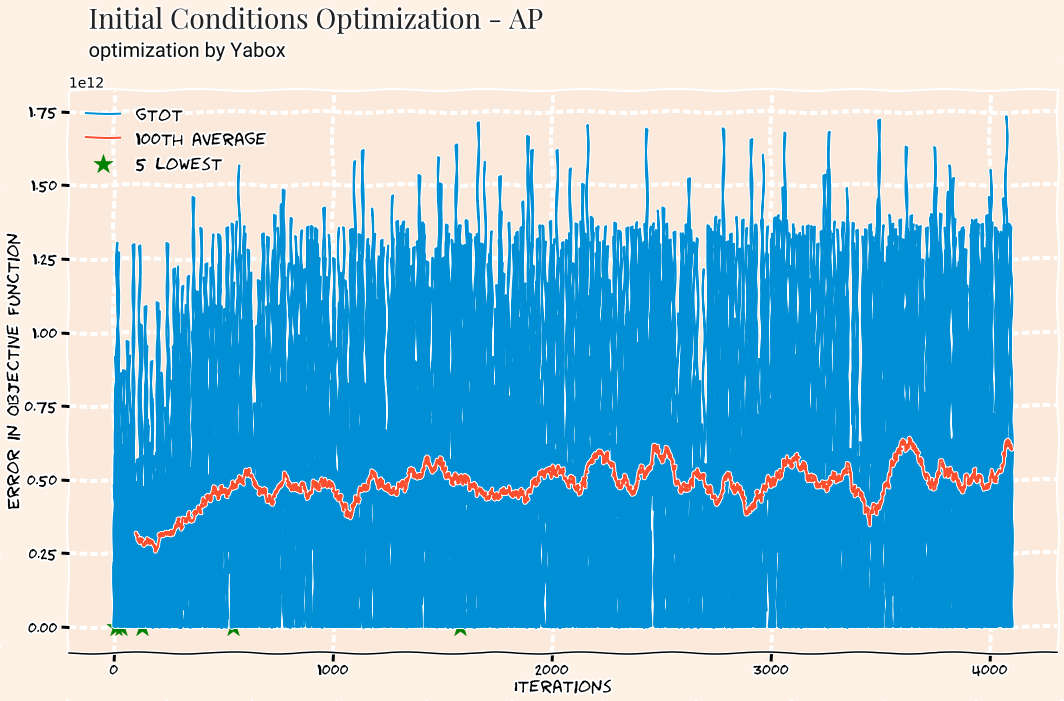

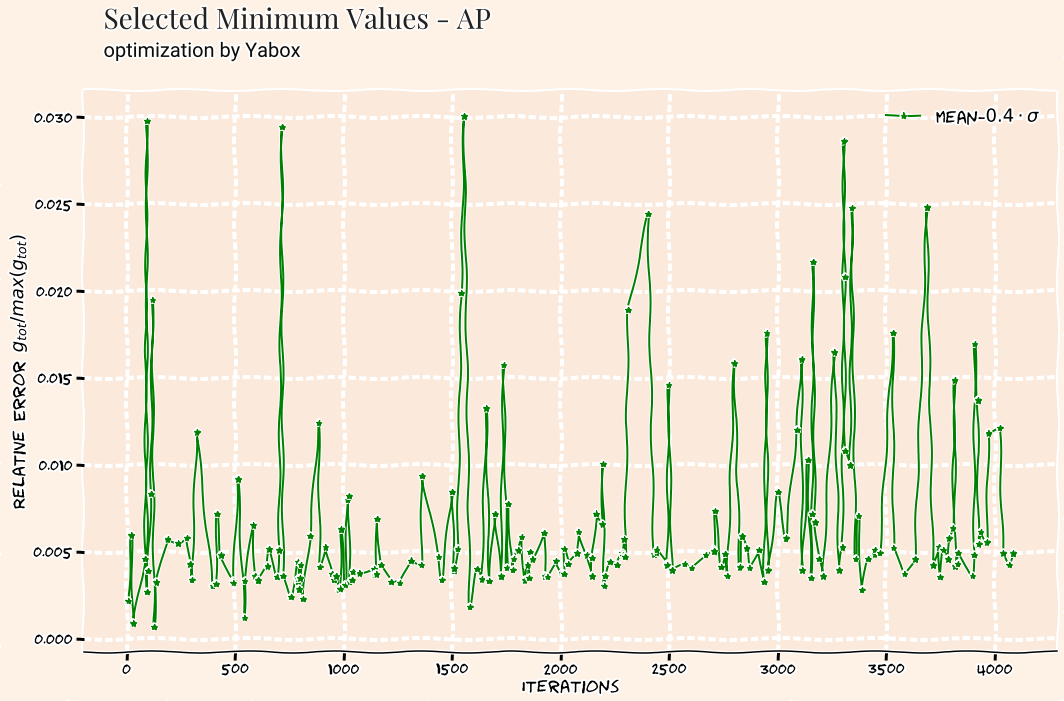

In [8]:
for state in states:
    versionStr=str(version)
    dateparse = lambda x: datetime.strptime(x, ' %Y-%m-%d')
    if newModel:
        histOptAll= pd.read_table('./results/history_'+state+versionStr+'.csv', sep=",", \
                                  index_col=0, header=None, parse_dates=[3], date_parser=dateparse,
            names = ["state","gtot",\
                "s0","startdate","i0","d0","startNcases","wcases","wrec"])
        histOptAll = histOptAll[['gtot', 'startdate','startNcases','s0',"i0","d0","wcases","wrec"]]
    else:
        histOptAll= pd.read_table('./results/history_'+state+versionStr+'.csv', sep=",", \
                                  index_col=0, header=None, parse_dates=['startdate'], date_parser=dateparse,
            names = ["state","gtot",\
                "s0","startdate","i0","wcases","wrec",\
                "beta0","beta01","startT","beta2","sigma",\
                "sigma2","sigma3","gamma","b","gamma2","d","mu"])
        histOptAll = histOptAll[['gtot', 'startdate','s0',"i0","wcases","wrec",\
                "beta0","beta01","startT","beta2","sigma",\
                "sigma2","sigma3","gamma","b","gamma2","d","mu"]]
        
    #clean data
    histOptAll=histOptAll.dropna(how='all')
    histOptAll.gtot=pd.to_numeric(histOptAll.gtot, errors='coerce')
    histOptAll = histOptAll.reset_index(drop=True)
    
    #format integers and decimal places
    if newModel:
        histOptAll['d0'] = histOptAll['d0'].apply(lambda x: int(x+0.5))
        histOptAll['startNcases'] = histOptAll['startNcases'].apply(lambda x: int(x+0.5))

    histOptAll['s0'] = histOptAll['s0'].apply(lambda x: int(x+0.5))
    histOptAll['i0'] = histOptAll['i0'].apply(lambda x: int(x+0.5))
    histOptAll['wcases'] = histOptAll['wcases'].apply(lambda x: round(x,4))
    histOptAll['wrec'] = histOptAll['wrec'].apply(lambda x: round(x,4))
    
    #print optimum parameters
    histOpt=histOptAll[histOptAll.gtot==min(histOptAll.gtot)]
    histOpt=histOpt.head(1)
    display(Markdown("# Results for "+state+" State Brazil"))
    display(histOpt.iloc[:,0:8])
    histOpt.to_csv("data/vars_optimized_"+state+model+"HistMin.csv", sep=",", index=False)
        
    #current parameters
    query = dfparam.query('state == "{}"'.format(state)).reset_index()
    parameters = np.array(query.iloc[:, 2:])[0]
    date,predict_range,s0,e0,a0,i0,r0,d0,startNCases,ratio,wcases,wrec = parameters
        
    #query parameters
    j = query['index'].values[0]
    
    #define s0, i0 and d0
    dfparam.at[j, "s0"] = histOpt.s0
    dfparam['s0'] = dfparam['s0'].apply(lambda x: int(x+0.5))
    dfparam.at[j, "i0"] = histOpt.i0
    dfparam['i0'] = dfparam['i0'].apply(lambda x: int(x+0.5))
    if newModel:
        dfparam.at[j, "d0"] = histOpt.d0
        dfparam.at[j, "START"] = histOpt.startNcases
    else:
        dfparam.at[j, "d0"] = d0
    dfparam['d0'] = dfparam['d0'].apply(lambda x: int(x+0.5))
    
    #define Start N Cases
    dfparam['START'] = dfparam['START'].apply(lambda x: int(x+0.5))
    
    #define date, wcases, wrec
    dfparam.at[j, "start-date"] = histOpt.startdate.dt.strftime('%Y-%m-%d').values[0]
    dfparam.at[j, "WCASES"] = histOpt.wcases
    dfparam.at[j, "WREC"] = histOpt.wrec
    
    #save new parameters
    dfparam.to_csv("data/param_optimized_"+model+"_HistMin.csv", sep=",", index=False)
    
    #prepare plotting
    color_bg = '#FEF1E5'
    # lighter_highlight = '#FAE6E1'
    darker_highlight = '#FBEADC'
    plt.rc('font', size=14)
    
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
        ax.patch.set_facecolor(darker_highlight)
        
        #fonts for the thicks
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(comic_font)
            label.set_fontsize(16) # Size here overrides font_prop
        
        #labels for x and y axis
        plt.xlabel("Iterations", fontproperties=comic_font)
        plt.ylabel("Error in Objective Function", fontproperties=comic_font)
        
        # Hide the left, right and top spines
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        #PLOTTING itself
        x=histOptAll.index
        y=histOptAll.gtot
        ax.plot(x,y, label="gtot")
        display(Markdown("## 5 Lowest Results "+state+" State Brazil"))
        histMin=histOptAll.nsmallest(5, ['gtot']).sort_values('gtot').iloc[:,0:8]
        display(histMin)

        ax.scatter(histMin.index, histMin.gtot,label="5 lowest",c='green',marker='*',s=400)
        histOptAll.rolling(100).mean()['gtot'].plot(label="100th average")

        # Adding a title and a subtitle
        plt.text(x = 0.02, y = 1.11, s = "Initial Conditions Optimization - "+state,
                    fontsize = 34, weight = 'bold', alpha = .85,transform=ax.transAxes, 
                    fontproperties=heading_font)
        plt.text(x = 0.02, y = 1.06,
                    s = "optimization by "+model,
                    fontsize = 26, alpha = .95,transform=ax.transAxes, 
                    fontproperties=subtitle_font)
        
        ax.legend(frameon=False,prop=comic_font,fontsize=20)
        ax.grid(True, linestyle='--', linewidth='2', color='white',alpha=0.2)

        fig.tight_layout()
        strFile ='./results/convergence_'+state+versionStr+'.png'
        fig.savefig(strFile, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
        plt.show()
        
        fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
        ax.patch.set_facecolor(darker_highlight)
        
        # Hide the left, right and top spines
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        #fonts for the thicks
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(comic_font)
            label.set_fontsize(16) # Size here overrides font_prop
        
        size=len(histOptAll)
        histMin=histOptAll.nsmallest(int(size*0.25+0.5), ['gtot']).sort_values('gtot').iloc[:,0:8]
        histMin.sort_index(inplace=True)
        
        histMin['error']=histMin.gtot/histMin.gtot.max()
        x=histMin.index[histMin.error<histMin.error.mean()-0.4*histMin.error.std()]
        y=histMin.error[histMin.error<histMin.error.mean()-0.4*histMin.error.std()]
        ax.plot(x, y, label="mean-$0.4 \cdot \sigma$",c='green',marker='*')
        
        #labels for x and y axis
        plt.xlabel("Iterations", fontproperties=comic_font)
        plt.ylabel("Relative Error $g_{tot}/max(g_{tot})$", fontproperties=comic_font)

        # Adding a title and a subtitle
        plt.text(x = 0.02, y = 1.11, s = "Selected Minimum Values - "+state,
                    fontsize = 34, weight = 'bold', alpha = .85,transform=ax.transAxes, 
                    fontproperties=heading_font)
        plt.text(x = 0.02, y = 1.06,
                    s = "optimization by "+model,
                    fontsize = 26, alpha = .95,transform=ax.transAxes, 
                    fontproperties=subtitle_font)
        
        ax.legend(frameon=False,prop=comic_font,fontsize=20)
        ax.grid(True, linestyle='--', linewidth='2', color='white',alpha=0.2)

        fig.tight_layout()
        strFile ='./results/minimumPoints_'+state+versionStr+'.png'
        fig.savefig(strFile, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
        plt.show()

In [9]:
display(Markdown("# Final Results for Initial Conditions"))
display(Markdown("## "+model+" optimization model"))

display(dfparam)

# Final Results for Initial Conditions

## Yabox optimization model

state  start-date  prediction-range        s0  e0  a0    i0   r0   d0  \
0     SP  2020-03-15               200  13441699   0   0  1419  300   14   
1     ES  2020-04-08               200    512296   0   0    52  250   88   
2     MG  2020-03-30               200   1795035   0   0   412  250    4   
3     RJ  2020-03-12               200    995092   0   0   820  250    1   
4     CE  2020-03-20               200    981004   0   0  1152  250   16   
5     PE  2020-03-19               200   1199337   0   0  1265  250   98   
6     AM  2020-03-24               200   1178492   0   0   922  250   53   
7     PA  2020-03-24               200   1132540   0   0  1234  250  116   
8     PI  2020-03-24               200    962264   0   0  1549  250   30   
9     RR  2020-03-19               200   1109936   0   0  1029  250    6   
10    AP  2020-03-14               200    672896   0   0  1303  250    3   

    START  RATIO  WCASES    WREC  
0       0   0.15  0.5758  0.0228  
1       1   0.15  0.7422  0.0432  
2       2   0.15  0.3731  0.0303  
3      35   0.15  0.6334  0.0339  
4       8   0.15  0.5564  0.0714  
5     116   0.15  0.7431  0.0459  
6      24   0.15  0.4114  0.0773  
7      66   0.15  0.7340  0.0497  
8      31   0.15  0.4410  0.0339  
9       2   0.15  0.5061  0.0229  
10     31   0.15  0.5386  0.0605